In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Entendendo o dataset

- ```id``` - Identificação única;
- ```tamanho_m2``` - Tamanho em metros quadrados;
- ```n_quartos``` - Numero de quartos;
- ```idade_casa``` - Tempo de construção da casa em anos;
- ```garagem``` - Se tem ou não garagem;
- ```localizacao_Periferia``` - Se a localização é periférica ou não;
- ```localizacao_Subúrbio``` - Se a localização é no subúrbio ou não;
- ```valor_aluguel``` - valor do aluguel.


# 2. Objetivo

Construir um modelo de machine learning capaz de prever o valor do aluguel de um imóvel com base em suas características.

# 3. Carregamento e preparação do dataset

### 3.1. Carregar os dados

In [34]:
df_aluguel = pd.read_csv('./dataset_aluguel.csv')

### 3.2. Checar informações do dataset

In [35]:
df_aluguel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     100 non-null    int64  
 1   tamanho_m2             100 non-null    float64
 2   n_quartos              100 non-null    int64  
 3   idade_casa             100 non-null    float64
 4   garagem                100 non-null    int64  
 5   localizacao_Periferia  100 non-null    bool   
 6   localizacao_Subúrbio   100 non-null    bool   
 7   valor_aluguel          100 non-null    float64
dtypes: bool(2), float64(3), int64(3)
memory usage: 5.0 KB


#### Conclusões retiadas da observação das informações do dataset:

- Temos os dados de 100 imóveis no dataset;
- A variável id não será utilizada na análise para preparação do modelo, vamos considerar eliminá-la;
- Os nomes das colunas do dataset são nomes que contém caracteres especiais. Vamos alterá-las para nomes mais técnicos;
- Não existem valores ausentes nesse dataset.

### 3.3. Vamos iniciar eliminando a variável ```id```.  Pois, para efeito de predição, essa variável não fará nenhum efeito.

In [36]:
# Removendo a coluna id
df_aluguel.drop(columns=['id'], axis=1, inplace=True)

# Visualisando novamente as informações do dataset
df_aluguel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tamanho_m2             100 non-null    float64
 1   n_quartos              100 non-null    int64  
 2   idade_casa             100 non-null    float64
 3   garagem                100 non-null    int64  
 4   localizacao_Periferia  100 non-null    bool   
 5   localizacao_Subúrbio   100 non-null    bool   
 6   valor_aluguel          100 non-null    float64
dtypes: bool(2), float64(3), int64(2)
memory usage: 4.2 KB


### 3.4. Padronizar os nomes das variáveis

In [37]:
# Renomeando as colunas
df_aluguel.columns = [
    'tamanho_m2',
    'n_quartos',
    'idade_casa',
    'garagem',
    'localizacao_periferica',
    'localizacao_suburbio',
    'valor_aluguel'
]

# Visualisando novamente as informações do dataset
df_aluguel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   tamanho_m2              100 non-null    float64
 1   n_quartos               100 non-null    int64  
 2   idade_casa              100 non-null    float64
 3   garagem                 100 non-null    int64  
 4   localizacao_periferica  100 non-null    bool   
 5   localizacao_suburbio    100 non-null    bool   
 6   valor_aluguel           100 non-null    float64
dtypes: bool(2), float64(3), int64(2)
memory usage: 4.2 KB


### 3.5. Copiar o daframe para termos um dataframe específico para EDA
Com isso, mantemos o df_aluguel intacto para ser utilizado no treinamento do modelo.

In [38]:
df_aluguel_eda = df_aluguel.copy()

### 4. Análise Exploratória dos Dados (EDA)

#### 4.1. Visualização dos dados

In [39]:
df_aluguel_eda.head(10)

,tamanho_m2,n_quartos,idade_casa,garagem,localizacao_periferica,localizacao_suburbio,valor_aluguel
0,106.181018,1,36.760806,0,True,False,1767.122088
1,192.607146,4,10.453581,1,True,False,3278.742397
2,159.799091,5,27.072399,1,True,False,2953.899737
3,139.798773,4,34.789220,1,False,True,2514.717108
4,73.402796,5,11.427501,0,False,True,1942.164396
5,73.399178,5,8.747746,1,True,False,2141.303241
6,58.712542,3,49.108417,1,True,False,1625.680981
7,179.926422,5,25.831795,0,False,True,2854.591908
8,140.167252,4,13.041459,1,True,False,2702.673542
9,156.210887,5,49.812685,1,False,False,2456.538289


#### 4.2. Verificação de Valores ausentes

In [40]:
df_aluguel_eda.isna().sum()

tamanho_m2                0
n_quartos                 0
idade_casa                0
garagem                   0
localizacao_periferica    0
localizacao_suburbio      0
valor_aluguel             0
dtype: int64

Conforme análise inicial feita no item ```3.2```, não há valores ausentes nesse dataset.

Caso o dateset apresentasse valores ausentes, haveria algumas possibilidades para ludar com eles à depender do contexto. Por exemplo:

- Para variáveis categóricas, considerar inputar o valor da moda de cada uma delas nos valores ausentes.
- Para variáveis numéricas, considerar inputar o valor da média ou mediana de cada uma delas nos valores ausentes. Para decidir se será a média ou mediana, seria preciso, primeiro, verificar os outliers.
- Considerar eliminar dados com valores ausentes.

### 4.3. Medidas estatísticas do dataframe

In [41]:
df_aluguel_eda.describe()

,tamanho_m2,n_quartos,idade_casa,garagem,valor_aluguel
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,120.527112,2.910000,25.794810,0.520000,2112.819084
std,44.623412,1.400541,14.348628,0.502117,514.314100
min,50.828318,1.000000,0.259243,0.000000,1192.728727
25%,78.980114,1.750000,13.969405,0.000000,1694.633091
50%,119.621368,3.000000,24.827177,1.000000,2069.395680
75%,159.530468,4.000000,37.252879,1.000000,2520.182679
max,198.033040,5.000000,49.812685,1.000000,3278.742397


#### Análise das medidas estísticas
##### tamanho_m2
- Medidas máxima e mínima parecem estar dentro da normalidade;
- Média e Mediana com valores quase iguais;
##### n_quartos
- Medidas máxima e mínima parecem estar dentro da normalidade;
- Média e Mediana com valores quase iguais;
##### idade_casa
- Medidas máxima e mínima parecem estar dentro da normalidade;
- Média e Mediana com valores quase iguais;
##### garagem
- Medidas máxima e mínima parecem estar dentro da normalidade;
- Média e Mediana com valores quase iguais;
##### valor_aluguel
- Medidas máxima e mínima parecem estar dentro da normalidade;
- Média e Mediana com valores relativamente próximos;
#### conclusão
- Não parace ter outliers nesse conjunto de dados. Vamos analisar melhor.

### 4.4. Verificar / Detectar outliers

- Boxplot da variável ```tamanho_m2```

<Axes: xlabel='tamanho_m2'>

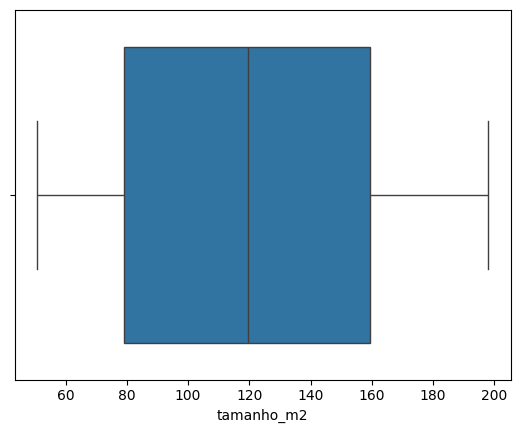

In [42]:
sns.boxplot(data=df_aluguel_eda, x='tamanho_m2')

A mediana encontra-se praticamento no centro e não há detecção de outliers.

- Boxplot da variável ```idade_casa```

<Axes: xlabel='idade_casa'>

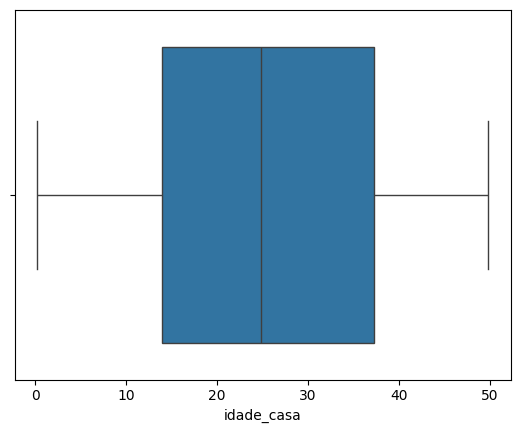

In [43]:
sns.boxplot(data=df_aluguel_eda, x='idade_casa')

A mediana apresenta um leve delocamento à esquerda e não há detecção de outliers.

- Boxplot da variável ```valor_aluguel```

<Axes: xlabel='valor_aluguel'>

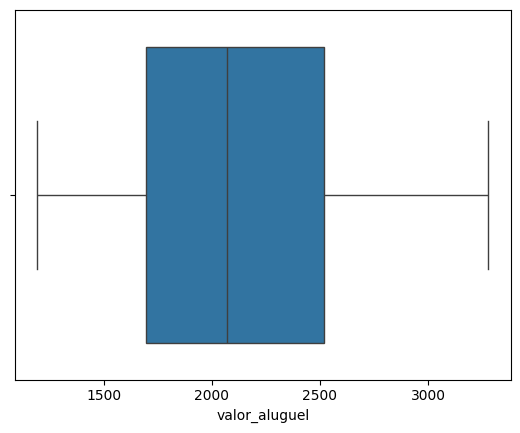

In [44]:
sns.boxplot(data=df_aluguel_eda, x='valor_aluguel')

A mediana apresenta um leve delocamento à esquerda e não há detecção de outliers.

### 4.5. Variáveis Categóricas X Variável Target

Objetivo:
- Verificar se o valor do aluguel muda de acordo com as variáveis categóricas e se há descrepâncias ou não

<Axes: xlabel='localizacao_periferica', ylabel='valor_aluguel'>

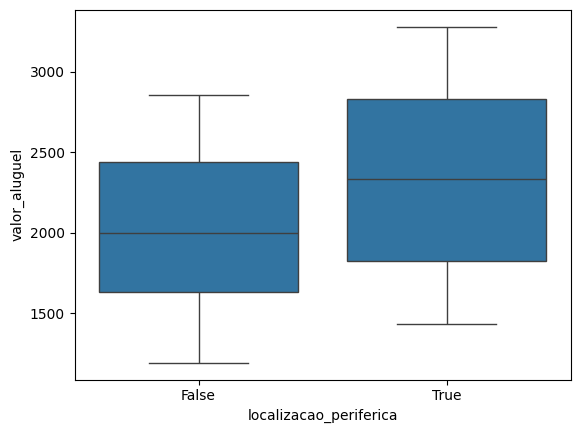

In [45]:
# localizacao_periferica X valor_aluguel
sns.boxplot(data=df_aluguel_eda, x='localizacao_periferica', y='valor_aluguel')

No gráfico, é possível perceber uma variação nos valores do aluguel dependendo se a localização é periférica ou não. A que possuem localização periférica, possuem valores mais altos de aluguel.

<Axes: xlabel='localizacao_suburbio', ylabel='valor_aluguel'>

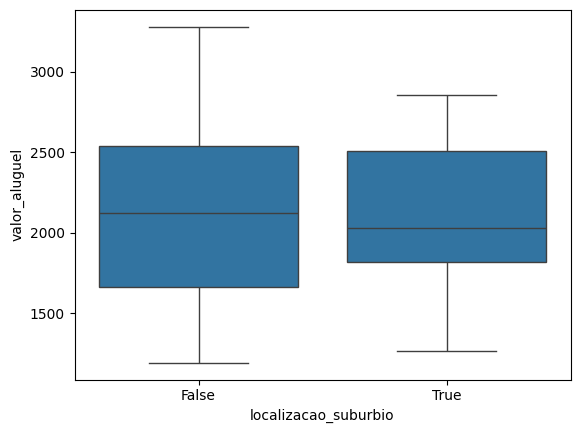

In [46]:
# localizacao_suburbio X valor_aluguel
sns.boxplot(data=df_aluguel_eda, x='localizacao_suburbio', y='valor_aluguel')

- A mediana é um pouco menor no subúrbio. Valores de aluguel que representam a mediana são um pouco mais baixos no subúrbio;
- O valor do aluguel fora do subúrbio apresenta um valor máximo mais alto do que no subúrbio.

### 4.6. Variáveis Numéricas X Variável Target

#### Análise da distribuição das variáveis numéricas em relação a variável target

<Axes: xlabel='tamanho_m2', ylabel='valor_aluguel'>

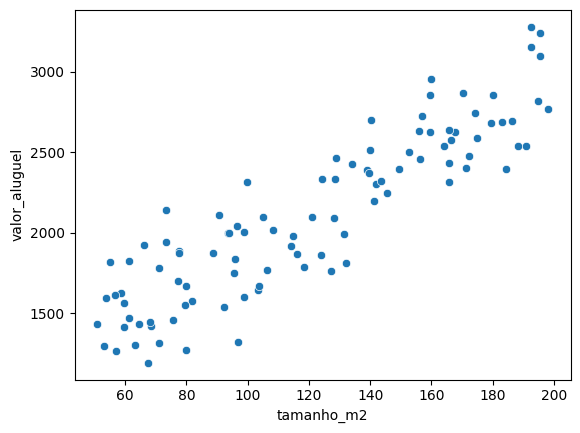

In [47]:
# tamanho_m2 X valor_aluguel
sns.scatterplot(data=df_aluguel_eda, x='tamanho_m2', y='valor_aluguel')

Nesse caso, tamanho_m2 X valor_aluguel, é possível observar uma certa tendência nos valores. Observa-se um crescimento no valor do aluguel a medida que o tamanho do imóvel aumenta.

<Axes: xlabel='idade_casa', ylabel='valor_aluguel'>

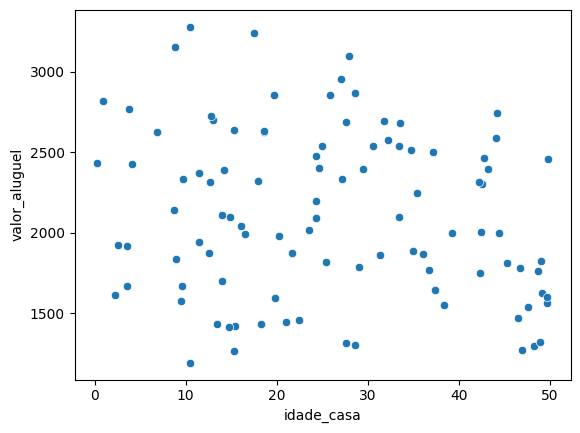

In [48]:
# idade_casa X valor_aluguel
sns.scatterplot(data=df_aluguel_eda, x='idade_casa', y='valor_aluguel')

Observando o gráfico, não foi possível visualisar nenhuma tendência ou padrão de valores. Ou seja, em uma análise apenas visual do gráfico de dispersão entre a idade_casa e o valor_aluguel, não é observado uma correlação entre essas duas variáveis.

<Axes: xlabel='n_quartos', ylabel='valor_aluguel'>

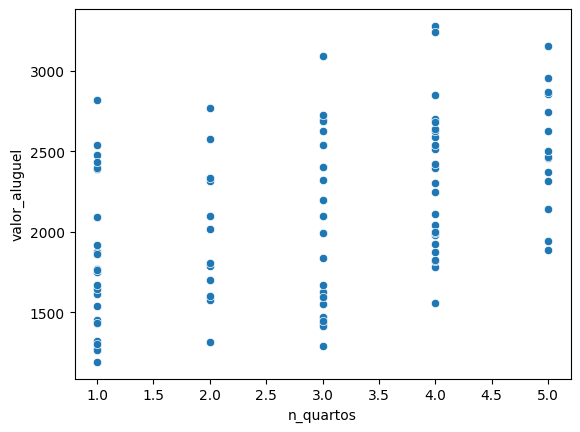

In [49]:
# n_quartos X valor_aluguel
sns.scatterplot(data=df_aluguel_eda, x='n_quartos', y='valor_aluguel')

Observando o gráfico, não foi possível visualisar nenhuma tendência ou padrão de valores. Ou seja, em uma análise apenas visual do gráfico de dispersão não é observado uma correlação entre essas duas variáveis.

### 4.7. Correlação

Para fazer o plot de correlação, precisamos tratar o dataframe. Para analisar a correlação, precisamos transformar as variáveis categóricas (localizacao_periferica e localizacao_suburbio) em numéricas.

In [50]:
# Converter as variáveis categóricas discretas em numéricas, usando o One-Hot Encoder do Pandas
df_aluguel_eda = pd.get_dummies(df_aluguel_eda, columns=['localizacao_periferica', 'localizacao_suburbio'], dtype='int64')
df_aluguel_eda.head(10)

,tamanho_m2,n_quartos,idade_casa,garagem,valor_aluguel,localizacao_periferica_False,localizacao_periferica_True,localizacao_suburbio_False,localizacao_suburbio_True
0,106.181018,1,36.760806,0,1767.122088,0,1,1,0
1,192.607146,4,10.453581,1,3278.742397,0,1,1,0
2,159.799091,5,27.072399,1,2953.899737,0,1,1,0
3,139.798773,4,34.789220,1,2514.717108,1,0,0,1
4,73.402796,5,11.427501,0,1942.164396,1,0,0,1
5,73.399178,5,8.747746,1,2141.303241,0,1,1,0
6,58.712542,3,49.108417,1,1625.680981,0,1,1,0
7,179.926422,5,25.831795,0,2854.591908,1,0,0,1
8,140.167252,4,13.041459,1,2702.673542,0,1,1,0
9,156.210887,5,49.812685,1,2456.538289,1,0,1,0


#### Gerar o mapa de calor com Correlação entre as variáveis

<Axes: >

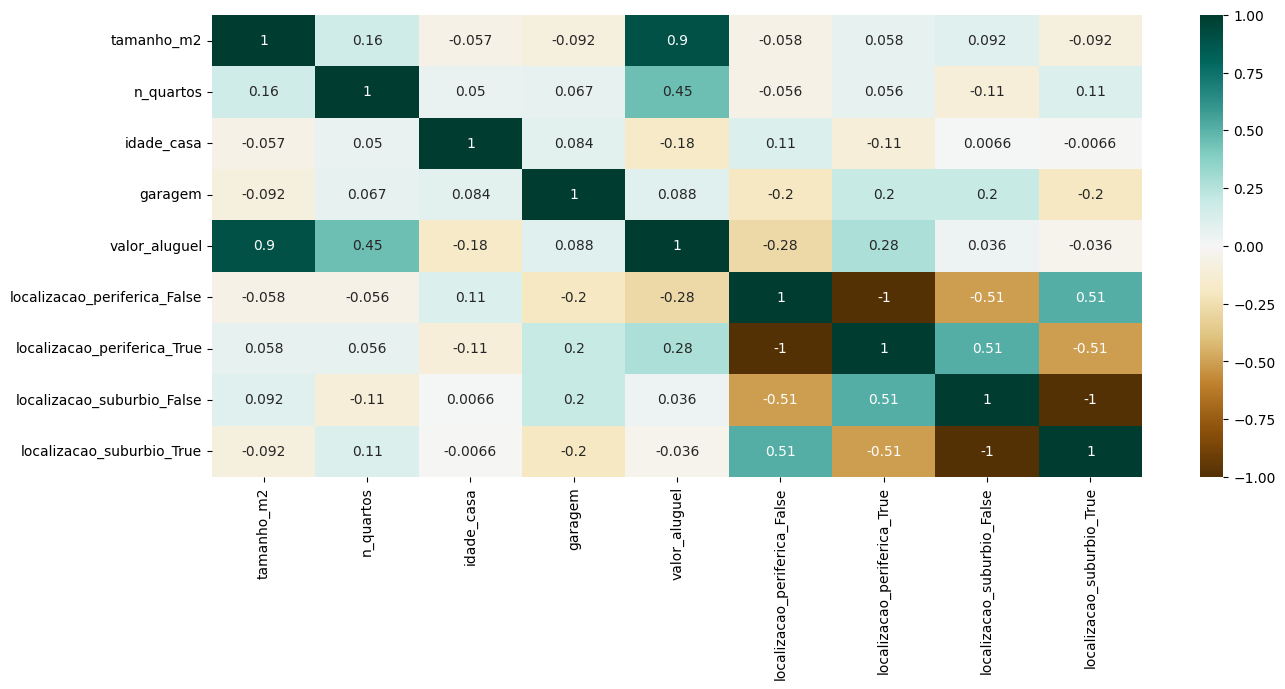

In [51]:
plt.figure(figsize=(15, 6))
sns.heatmap(df_aluguel_eda.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')

Analisando o mapa de calor, é possível perceber que:
- A conversão das variáveis categóricas discretas em variáveis numéricas, gerou um problemas de multicolinearidade, ou seja, elas possuem uma correlação forte entre si, como a correlação entre as variáveis ```localizacao_periferica_True``` e ```localizacao_periferica_False```;
- Foi possível confirmar a forte correlação entre variável independente ```tamanho_m2``` e a variável target ```valor_aluguel```;

<Axes: >

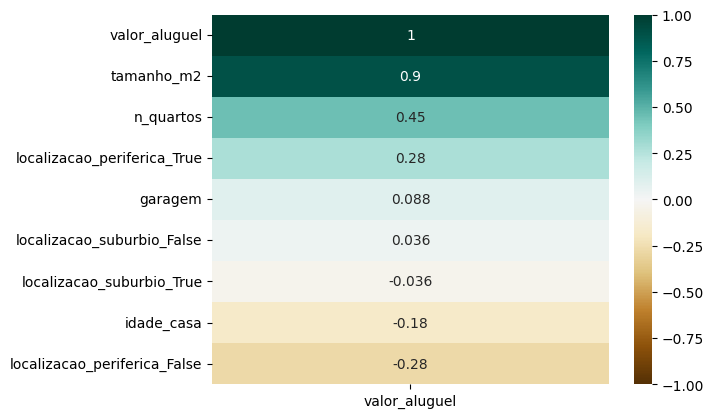

In [52]:
# Mostrar em formato de Ranking, somente a correlação com a variável target
sns.heatmap(df_aluguel_eda.corr()[['valor_aluguel']].sort_values(by='valor_aluguel', ascending=False), vmin=-1, vmax=1, annot=True, cmap= 'BrBG')

Nesse formato do mapa de calor é possível visualizar melhor a forte correlação entre as variáveis ```tamanho_m2``` e ```valor_aluguel```